In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [4]:
l_b=np.array([20, 100, 100])# lower hsv bound for red
u_b=np.array([24, 255, 255])# upper hsv bound to red
kernel = np.ones((11,11),np.uint8)


frame = cv2.imread("./test_data/block.jpg")
frame = cv2.resize(frame, (1280, 720))
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(frame, l_b, u_b)

mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

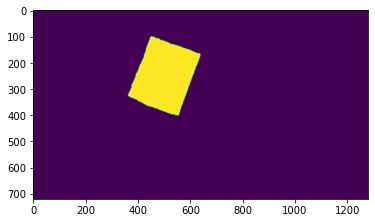

In [5]:
plt.imshow(mask)

In [6]:

frame = cv2.imread("./test_data/block.jpg")
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(frame, l_b, u_b)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
contours,_= cv2.findContours(mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

max_contour = contours[0]
for contour in contours:
    if cv2.contourArea(contour)>cv2.contourArea(max_contour):
        max_contour=contour
        
cv2.drawContours(frame, max_contour, -1, (0,255,0), 25)
# contour=max_contour
# approx=cv2.approxPolyDP(contour, 0.01*cv2.arcLength(contour,True),True)
# x,y,w,h=cv2.boundingRect(approx)
# _ = cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),8)
frame = cv2.cvtColor(frame, cv2.COLOR_HSV2RGB)

(2160, 3840, 3)

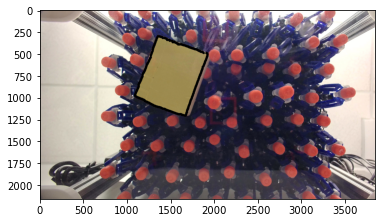

In [12]:

plt.imshow(frame)
frame.shape

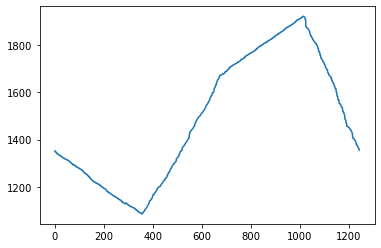

In [10]:
plt.plot(max_contour[:,0,0])

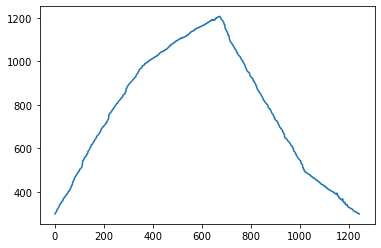

In [11]:
plt.plot(max_contour[:,0,1])

In [14]:

robot_positions = np.zeros((8,8,2))
for i in range(8):
    for j in range(8):
        if i%2==0:
            robot_positions[i,j] = (i*43.301, -21.65 + j*-37.5)
        else:
            robot_positions[i,j] = (i*43.301, j*-37.5)

robot_positions

array([[[   0.   ,  -21.65 ],
        [   0.   ,  -59.15 ],
        [   0.   ,  -96.65 ],
        [   0.   , -134.15 ],
        [   0.   , -171.65 ],
        [   0.   , -209.15 ],
        [   0.   , -246.65 ],
        [   0.   , -284.15 ]],

       [[  43.301,   -0.   ],
        [  43.301,  -37.5  ],
        [  43.301,  -75.   ],
        [  43.301, -112.5  ],
        [  43.301, -150.   ],
        [  43.301, -187.5  ],
        [  43.301, -225.   ],
        [  43.301, -262.5  ]],

       [[  86.602,  -21.65 ],
        [  86.602,  -59.15 ],
        [  86.602,  -96.65 ],
        [  86.602, -134.15 ],
        [  86.602, -171.65 ],
        [  86.602, -209.15 ],
        [  86.602, -246.65 ],
        [  86.602, -284.15 ]],

       [[ 129.903,   -0.   ],
        [ 129.903,  -37.5  ],
        [ 129.903,  -75.   ],
        [ 129.903, -112.5  ],
        [ 129.903, -150.   ],
        [ 129.903, -187.5  ],
        [ 129.903, -225.   ],
        [ 129.903, -262.5  ]],

       [[ 173.204,  -21.65 ],
  